# Capstone project: Providing data-driven suggestions for HR

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions

## Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

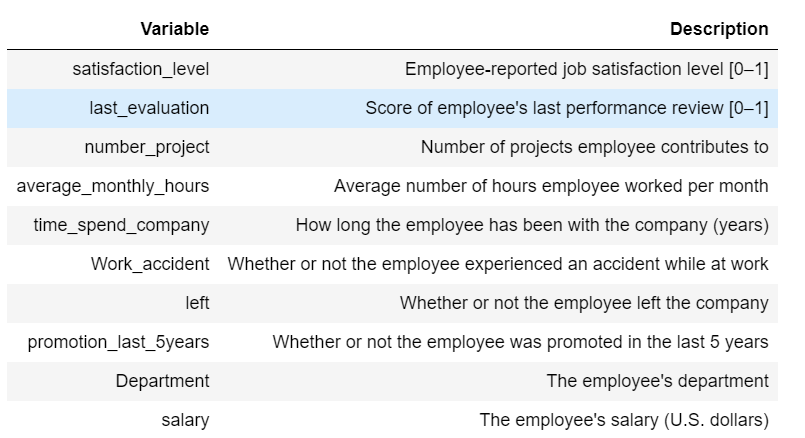

## import data

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.shape

(14999, 10)

In [5]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df0.duplicated().sum()

3008

In [7]:
#let's drop duplicate
df1 = df0.drop_duplicates(keep = 'first')
df1.duplicated().sum()

0

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [9]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Rename columns

In [10]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [11]:
df1.columns = (df1.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

In [12]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

## check outliers

In [14]:
columns = ('satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years')

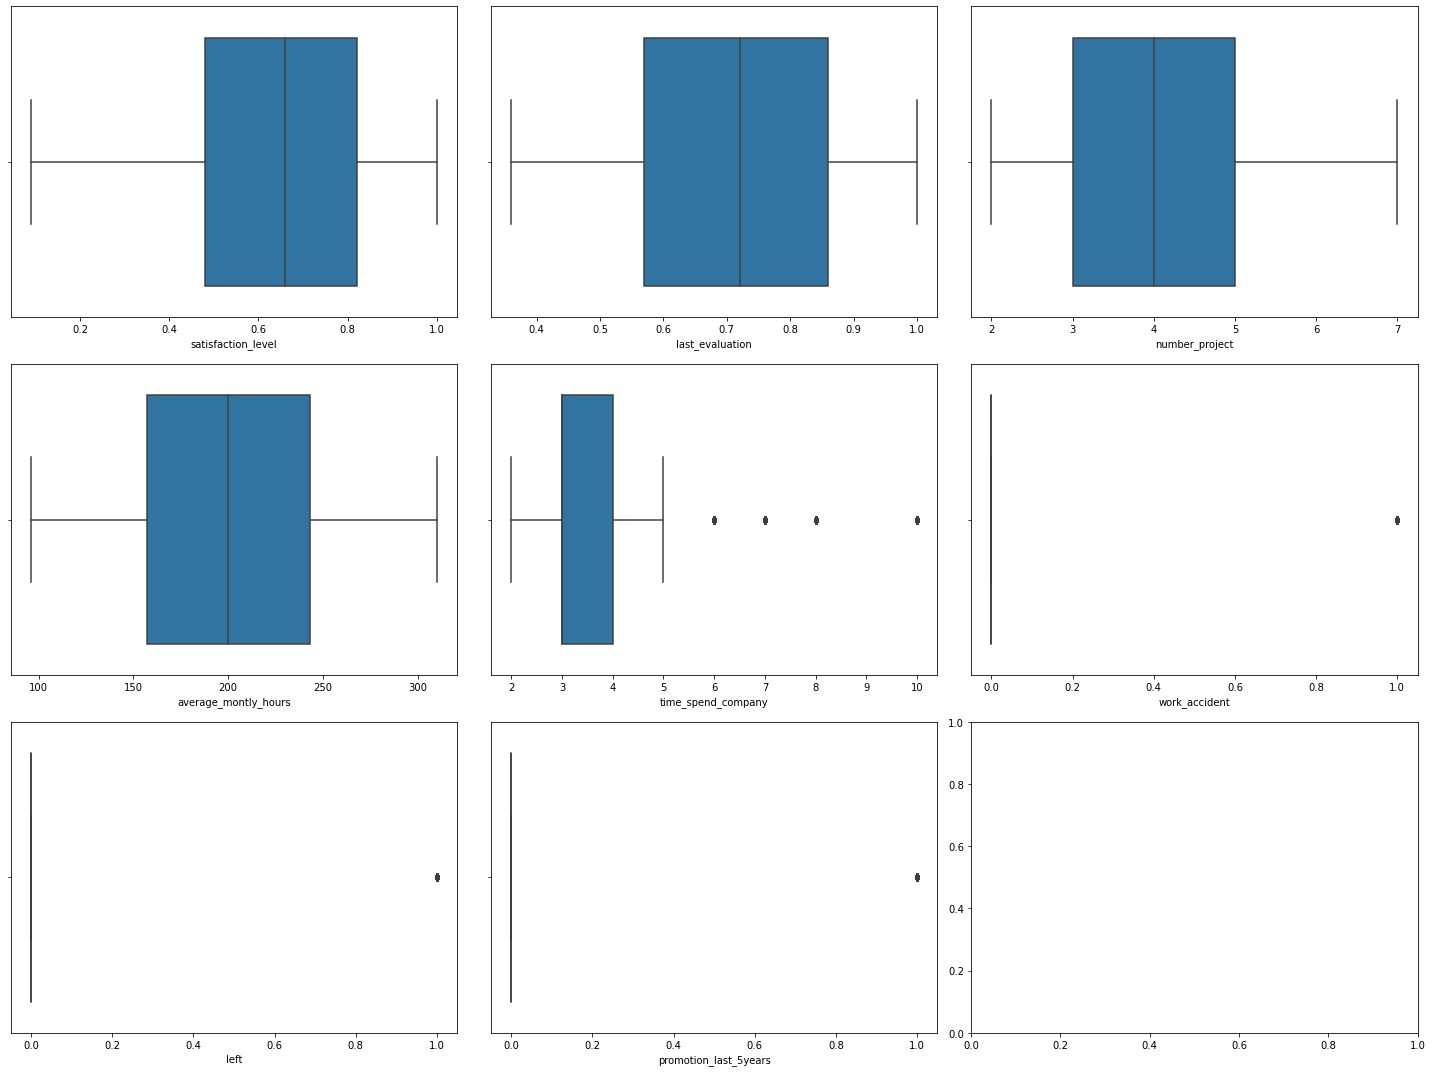

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
axs = axs.flatten()
for i, var in enumerate(columns):
    sns.boxplot(x = var, data = df1, ax = axs[i])

fig.tight_layout()
plt.show()

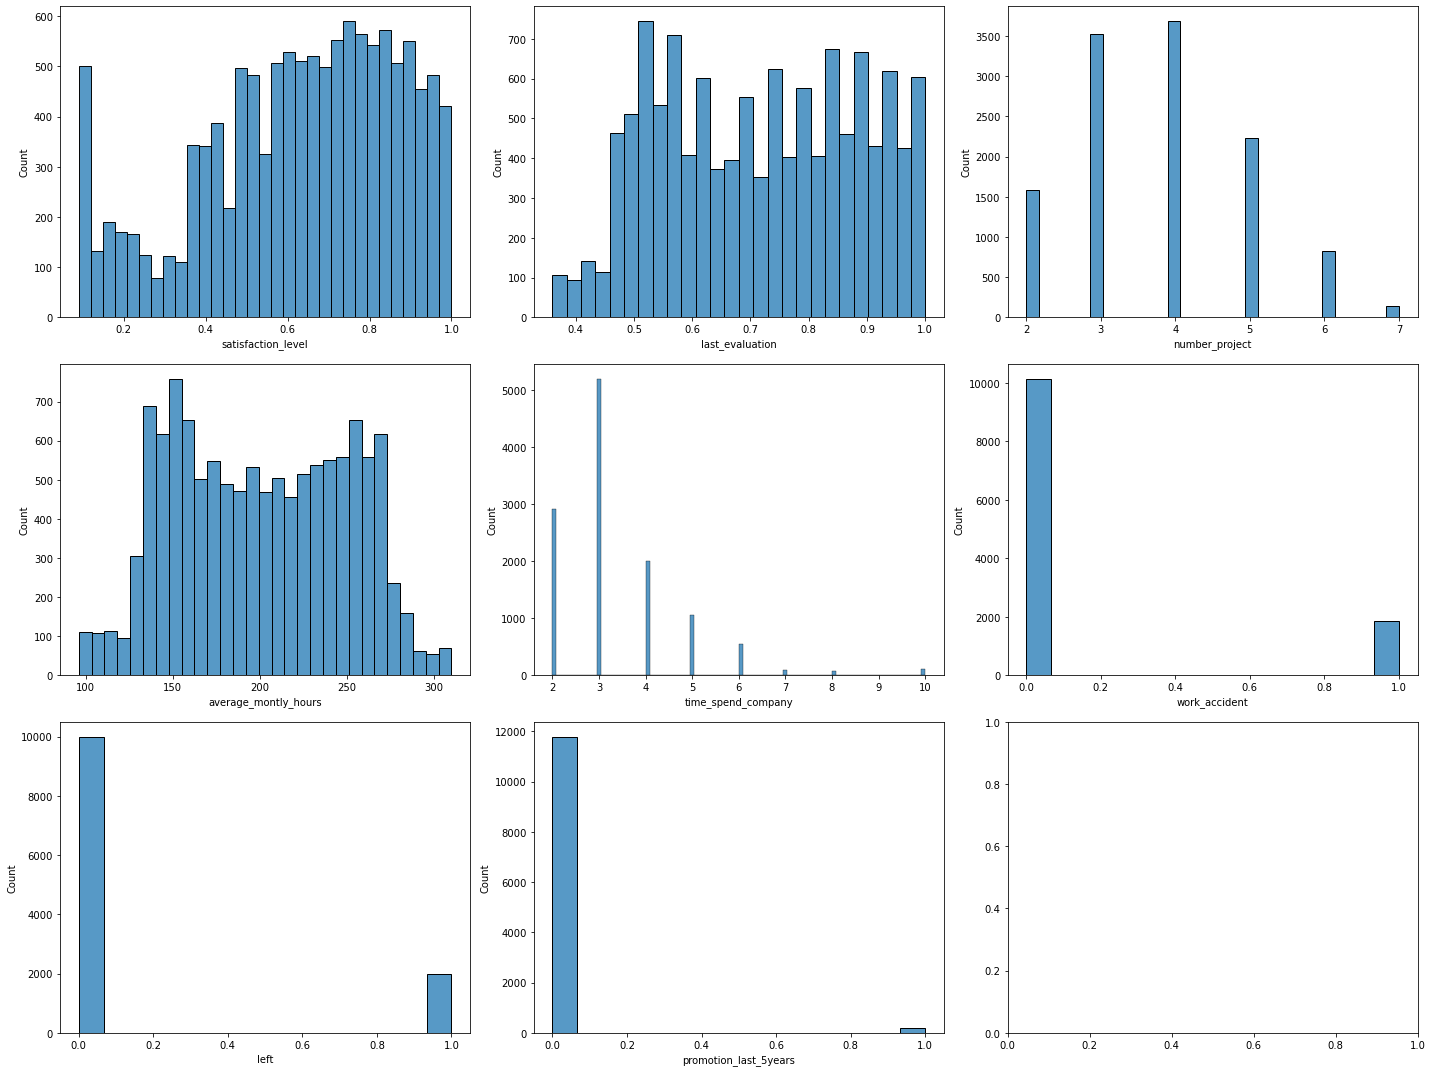

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
axs = axs.flatten()
for i, var in enumerate(columns):
    sns.histplot(x = var, data = df1, ax = axs[i])

fig.tight_layout()
plt.show()

In [ ]:
# Compute the 25th percentile value in `tenure`
percentile25 = df1['time_spend_company'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['time_spend_company'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['time_spend_company'] > upper_limit) | (df1['time_spend_company'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

## Step 2. Data Exploration (Continue EDA)

In [18]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [19]:
df1['left'].value_counts(normalize = True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

base on the result above we can tell that the has over 83% retention.

In [20]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

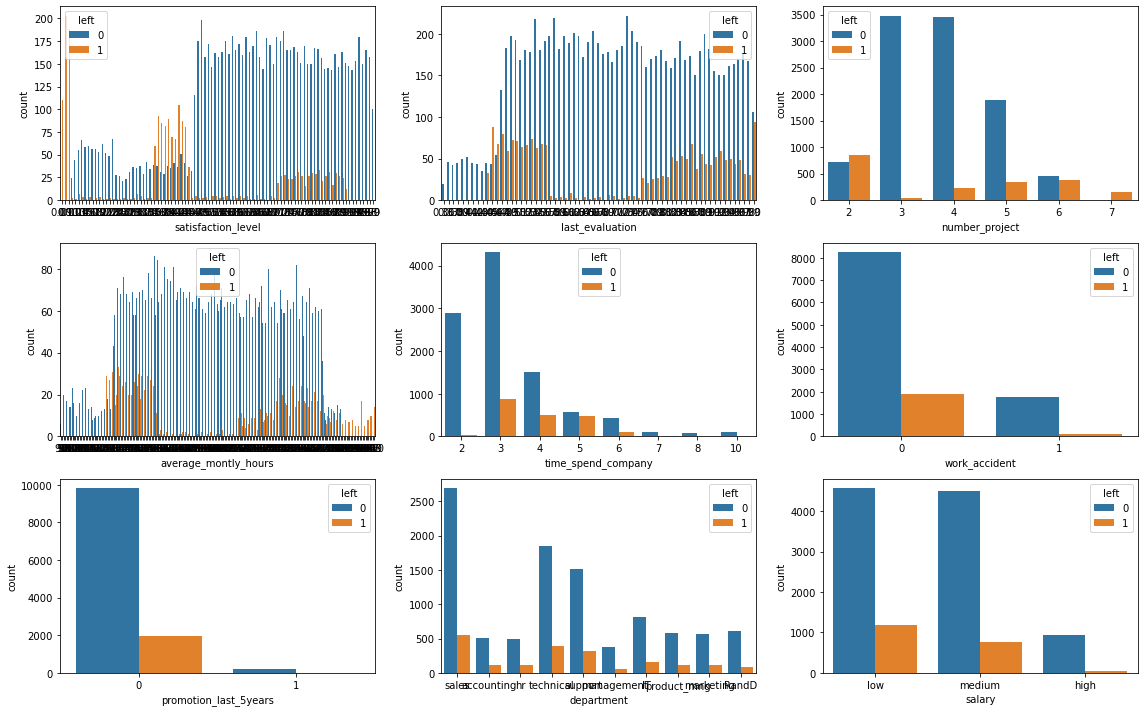

In [21]:
plt.figure(figsize = (16,10))
countplot_list = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary']
x=1
for i in countplot_list:
    plt.subplot(3,3,x)
    sns.countplot(x=i,hue='left',data=df1)
    x = x + 1
plt.tight_layout()

## satisfaction level, average montly hours and last evalustion

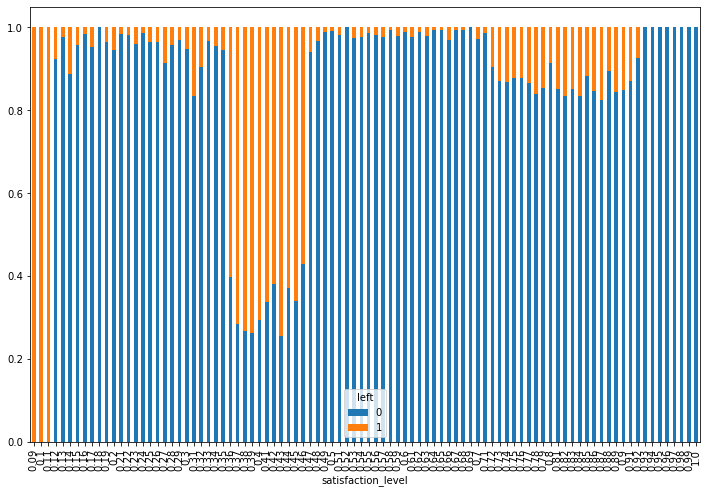

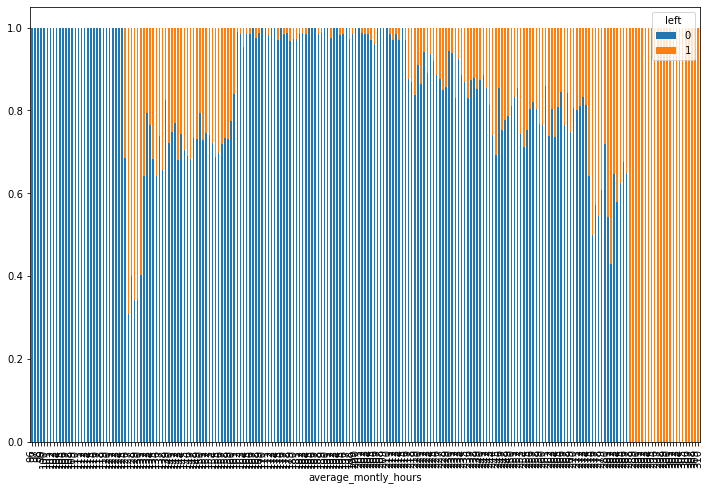

<AxesSubplot:xlabel='last_evaluation'>

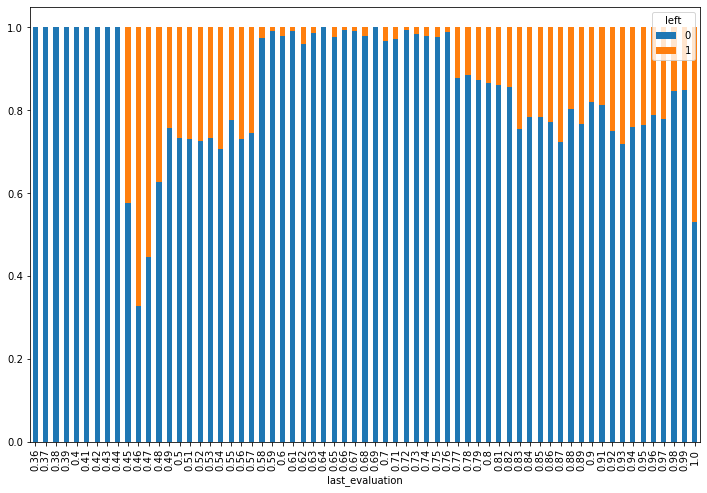

In [22]:
satisfaction_level=pd.crosstab(df1['satisfaction_level'],df1['left']) 
average_monthly_hours =pd.crosstab(df1['average_montly_hours'],df1['left']) 
last_evaluation = pd.crosstab(df1['last_evaluation'], df1['left'])

satisfaction_level.div(satisfaction_level.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12,8)) 
plt.show() 
average_monthly_hours.div(average_monthly_hours.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(12,8)) 
plt.show()
last_evaluation.div(last_evaluation.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,figsize=(12,8))

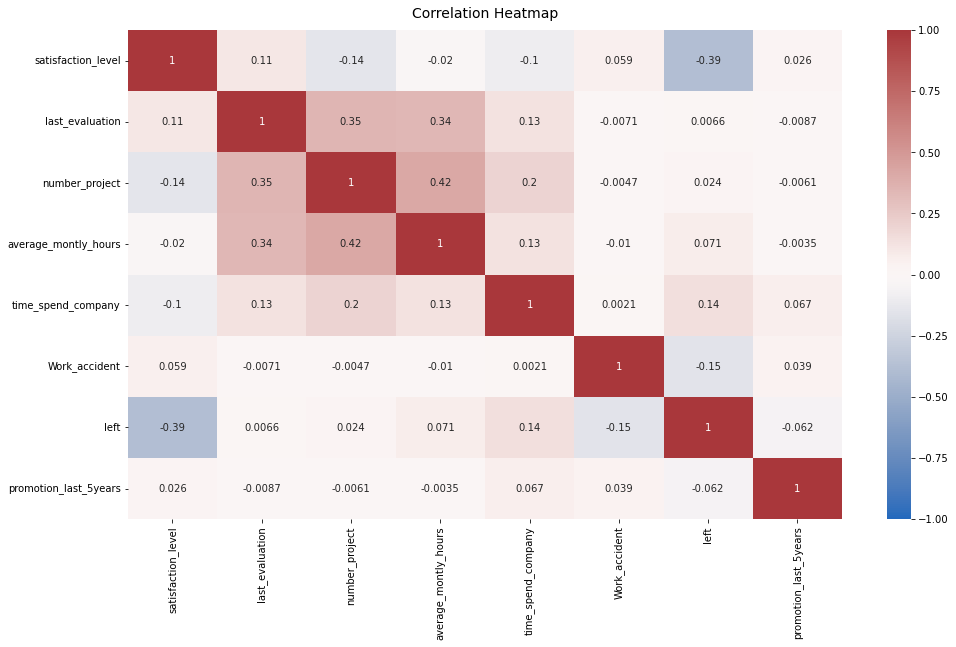

In [23]:

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

* Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

In [24]:
data = df1.copy()

## remove outliers

In [25]:
#define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    
    ls = data.index[ (data[col] < lower) | (data[col] > upper)]
    
    return ls

In [26]:
ls

 Volume in drive C is Windows
 Volume Serial Number is FA1B-9C99

 Directory of C:\Users\philippe\Dropbox\Documents\Machine Learning

09/04/2023  10:14 PM    <DIR>          .
09/04/2023  10:14 PM    <DIR>          ..
08/28/2023  09:14 PM    <DIR>          .ipynb_checkpoints
06/13/2023  08:10 PM            12,445 2 sample-test hypothesis.ipynb
06/14/2023  07:33 PM            34,215 2 sample-test-hypothesis.ipynb
04/06/2023  07:52 PM            16,557 2015.csv
04/06/2023  07:52 PM            17,132 2016.csv
04/06/2023  07:52 PM            29,536 2017.csv
06/14/2023  06:36 PM         2,401,457 2017_Yellow_Taxi_Trip_Data.csv
04/06/2023  07:52 PM             8,809 2018.csv
04/06/2023  07:52 PM             8,822 2019.csv
12/26/2022  10:31 AM           123,610 Accenture internship.ipynb
12/22/2022  02:13 PM         1,370,545 accenture_project.csv
01/17/2023  03:10 PM             2,571 Accuracy plot.jpg
08/28/2023  09:14 PM           116,545 Activity_ Course 7 Salifort Motors project lab.ipynb

In [27]:
#create an empty list to store the output indices from multiple columns

index_list = []

for col in ['time_spend_company']:
    index_list.extend(outliers(data, col))

In [28]:
# Define a function called "remove" which returns a cleaned dataframe without outliers

def remove(data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data

In [29]:
data = remove(data, index_list)

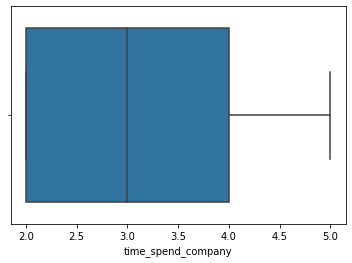

In [30]:
sns.boxplot(x = 'time_spend_company', data = data)
plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_project         11167 non-null  int64  
 3   average_montly_hours   11167 non-null  int64  
 4   time_spend_company     11167 non-null  int64  
 5   work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   department             11167 non-null  object 
 9   salary                 11167 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 959.7+ KB


## other ways to remove outliers

In [32]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


## label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [34]:
cols = ['department', 'salary']
data_coded = data.copy()

In [35]:
# Trasform other categories 
for i in cols:
    data_coded[i]=le.fit_transform(data[i])

In [36]:
data_coded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1


## data processing

In [37]:
X = data_coded.drop('left', axis = 1).values
y = data_coded['left'].values.ravel()

In [38]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.3, random_state = 0)

### scaling data

In [39]:
# Feature Scaling
from sklearn import preprocessing
X_test = preprocessing.scale(X_test)
X_train = preprocessing.scale(X_train)

## Logistic Regression

In [40]:
#Hyperparameter tuning
# define model/create instance
from sklearn.model_selection import StratifiedKFold

In [41]:
lr = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train)

In [42]:
# Use the logistic regression model to get predictions on the test set
y_pred= lr.predict(X_test)

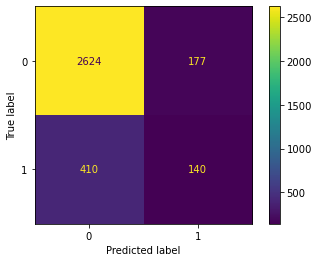

In [43]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=lr.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [44]:
data_coded['left'].value_counts(normalize=True)*100

0    83.146772
1    16.853228
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [45]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2801
    Predicted would leave       0.44      0.25      0.32       550

                 accuracy                           0.82      3351
                macro avg       0.65      0.60      0.61      3351
             weighted avg       0.80      0.82      0.80      3351



### tuning

In [46]:
clf=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1,0.5,1,10], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= clf,param_grid=param,
                    scoring='accuracy',cv=folds,return_train_score=True, refit='roc_auc')
#train model to learn relationships between x and y
model.fit(X_train,y_train)

C:\Users\philippe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10000 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\philippe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\philippe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\philippe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    r

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.992064128256513},
                                          {...
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.

In [47]:
# print best hyperparameters
model.best_score_
print("Best hyperparameters: ", model.best_params_)

Best hyperparameters:  {'C': 10, 'class_weight': {0: 0.317434869739479, 1: 0.682565130260521}, 'penalty': 'l2'}


### Build Model using optimal values of Hyperparameters

In [48]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0: 0.317434869739479, 1: 0.682565130260521},C=10,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=10,
                   class_weight={0: 0.317434869739479, 1: 0.682565130260521})

In [49]:
from sklearn.model_selection import cross_val_score
acc1 = cross_val_score(lr2, X_test, y_test, scoring ='accuracy', cv = 5).mean()
acc1

0.8481113063594101

In [50]:
y_pred2 = lr2.predict(X_test)

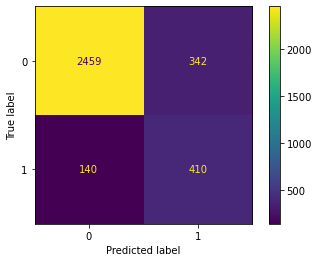

In [51]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred2, labels=lr2.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=lr2.classes_)

# Plot confusion matrix
disp.plot(values_format='')

# Display plot
plt.show()

In [52]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.95      0.88      0.91      2801
    Predicted would leave       0.55      0.75      0.63       550

                 accuracy                           0.86      3351
                macro avg       0.75      0.81      0.77      3351
             weighted avg       0.88      0.86      0.86      3351



In [53]:
# The estimated coefficients will all be around 1:
print(lr2.coef_)

[[-1.26045875 -0.00468607 -0.72609648  0.15067219  1.31415066 -0.55197827
  -0.21260225  0.08589465  0.02614162]]


In [54]:
data_coded.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [55]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 
       'promotion_last_5years', 'department', 'salary']

In [56]:
feature_importance = dict(zip(columns, lr2.coef_[0]))

In [57]:
feature_importance

{'satisfaction_level': -1.2604587495687334,
 'last_evaluation': -0.0046860735630656755,
 'number_project': -0.7260964842811773,
 'average_montly_hours': 0.15067219335329401,
 'time_spend_company': 1.3141506592925978,
 'work_accident': -0.5519782691007298,
 'promotion_last_5years': -0.21260225026223006,
 'department': 0.08589464845903005,
 'salary': 0.02614162391469429}

In [58]:
ab = lr2.coef_[0].tolist()
ab

[-1.2604587495687334,
 -0.0046860735630656755,
 -0.7260964842811773,
 0.15067219335329401,
 1.3141506592925978,
 -0.5519782691007298,
 -0.21260225026223006,
 0.08589464845903005,
 0.02614162391469429]

In [64]:
lol = pd.DataFrame({'feature_names': columns,
                    'feature_importance':ab} )

In [65]:
lol

,feature_names,feature_importance
0,satisfaction_level,-1.260459
1,last_evaluation,-0.004686
2,number_project,-0.726096
3,average_montly_hours,0.150672
4,time_spend_company,1.314151
5,work_accident,-0.551978
6,promotion_last_5years,-0.212602
7,department,0.085895
8,salary,0.026142


In [67]:
lol.sort_values(by=['feature_importance'])

,feature_names,feature_importance
0,satisfaction_level,-1.260459
2,number_project,-0.726096
5,work_accident,-0.551978
6,promotion_last_5years,-0.212602
1,last_evaluation,-0.004686
8,salary,0.026142
7,department,0.085895
3,average_montly_hours,0.150672
4,time_spend_company,1.314151


In [68]:
feature_imp1 = pd.Series(ab, index=columns).sort_values(ascending=False)
feature_imp1

time_spend_company       1.314151
average_montly_hours     0.150672
department               0.085895
salary                   0.026142
last_evaluation         -0.004686
promotion_last_5years   -0.212602
work_accident           -0.551978
number_project          -0.726096
satisfaction_level      -1.260459
dtype: float64

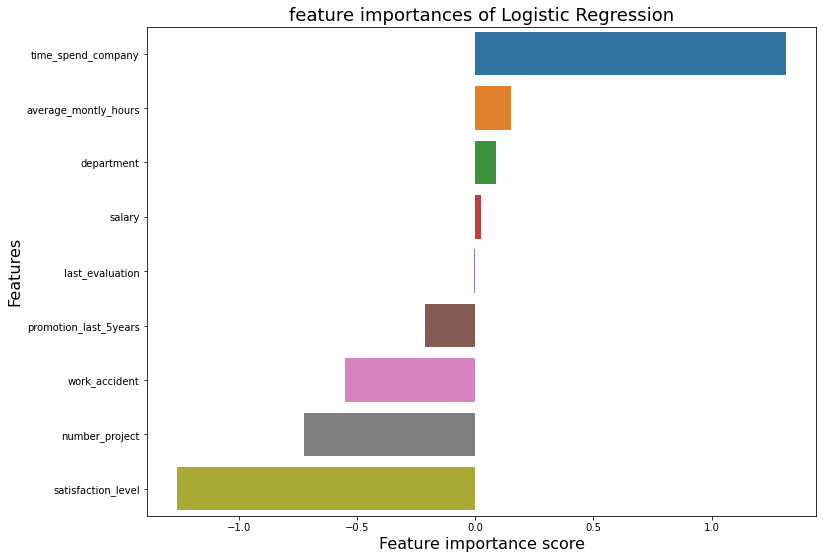

In [69]:
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.barplot(x=feature_imp1, y=feature_imp1.index)
ax.set_title("feature importances of Logistic Regression", size = 18)
ax.set_yticklabels(feature_imp1.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

##    ## Roc Curve of Logistic Regression

In [74]:
import sklearn.metrics as metrics

In [75]:
# Print out the predicted probabilities
coco =lr2.predict_proba(X_test)[::,-1]

In [76]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  coco)
roc_auc1 = metrics.roc_auc_score(y_test, coco)

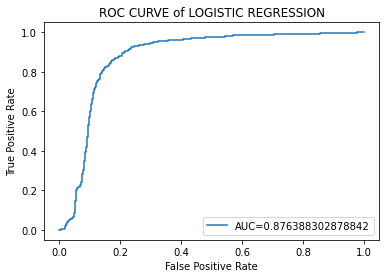

In [85]:
#create ROC curve
         
fpr, tpr, _ = metrics.roc_curve(y_test,  coco)
roc_auc1 = metrics.roc_auc_score(y_test, coco)

# Plot the ROC curve and add the AUC value as a label
plt.plot(fpr, tpr, label="AUC=" + str(roc_auc1))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE of LOGISTIC REGRESSION')
plt.show()

In [167]:
def models(model_name:str, model, X_test, y_test):
    
    preds = model.predict(X_test)
    auc = roc_auc_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
     # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    
    return table   

In [168]:
table_lr = models('Logistic regression', lr2, X_test, y_test)
table_lr

,model,precision,recall,F1,accuracy,auc
0,Logistic regression,0.545213,0.745455,0.6298,0.856162,0.811678


## Modeling Approach B: Tree-based Model

## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

In [114]:
# Instantiate the model
tree = DecisionTreeClassifier(random_state=0, criterion = 'entropy')

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2, 4, 6, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [115]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 3.81 s
Wall time: 4.13 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'accuracy', 'precision', 'f1'})

In [117]:
#Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [118]:
tree2 = DecisionTreeClassifier(random_state=0, criterion = 'entropy',
                               max_depth= 4, min_samples_leaf=5, min_samples_split= 2 )

In [119]:
# Fit the model to training data
tree2.fit(X_train, y_train)

# Make predictions on test data
dt_pred = tree2.predict(X_test)

In [120]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.966
Precision: 0.902
Recall: 0.891
F1 Score: 0.897


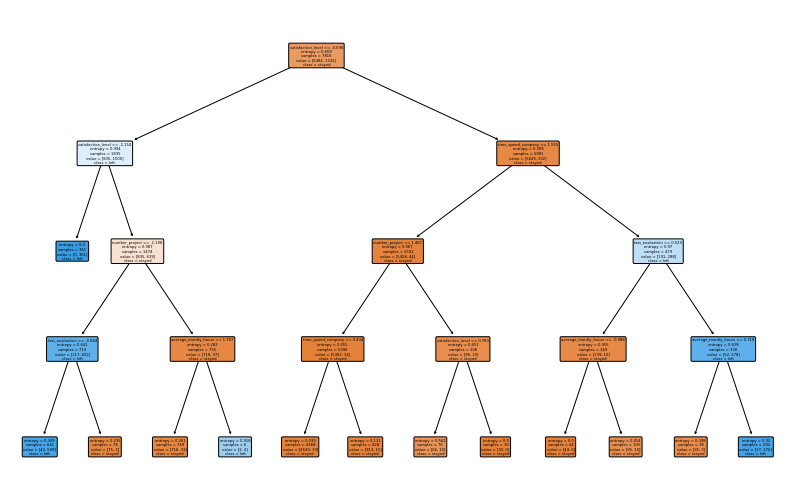

In [121]:
import graphviz
import matplotlib.pyplot as plt

columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 
       'promotion_last_5years', 'department', 'salary']

plt.figure(figsize=(14, 9))
plot_tree(tree2,
         filled =True,
         rounded = True,
         class_names =["stayed", "left"],
         feature_names = columns);

In [122]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, dt_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2801
    Predicted would leave       0.90      0.89      0.90       550

                 accuracy                           0.97      3351
                macro avg       0.94      0.94      0.94      3351
             weighted avg       0.97      0.97      0.97      3351



## Roc Curve of Decision Tree

In [125]:
# Print out the predicted probabilities
dt_pred =tree2.predict_proba(X_test)[::,-1]

In [126]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  dt_pred2)
roc_auc2 = metrics.roc_auc_score(y_test, dt_pred2)

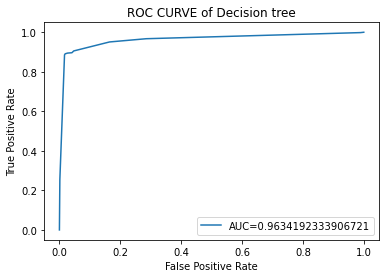

In [127]:
# Plot the ROC curve and add the AUC value as a label
plt.plot(fpr, tpr, label="AUC=" + str(roc_auc2))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE of Decision tree')
plt.show()

### feature importance of decision tree

In [130]:
imp = tree2.feature_importances_

In [132]:
feature_imp2 = pd.Series(tree2.feature_importances_, index=columns).sort_values(ascending=False)
feature_imp2

satisfaction_level       0.437822
time_spend_company       0.243417
number_project           0.190949
last_evaluation          0.100252
average_montly_hours     0.027560
work_accident            0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

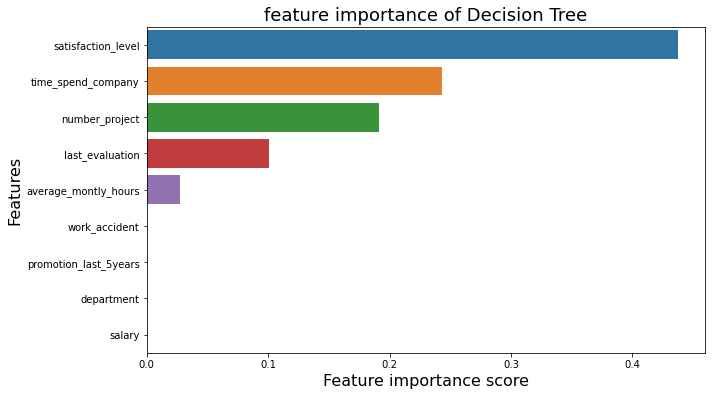

In [135]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=feature_imp2, y=feature_imp2.index)
ax.set_title("feature importance of Decision Tree", size = 18)
ax.set_yticklabels(feature_imp2.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

In [169]:
table_tree = models('Decision Tree', tree2, X_test, y_test)
table_tree

,model,precision,recall,F1,accuracy,auc
0,Decision Tree,0.902394,0.890909,0.896615,0.966279,0.935994


## random Forest

In [136]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [137]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: total: 32min 23s
Wall time: 33min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'accuracy', 'precision', 'f1'})

In [138]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [139]:
rf2 = RandomForestClassifier(random_state=0, max_depth = 5, max_features = 1.0,
                            max_samples = 0.7, min_samples_leaf = 1, min_samples_split = 4,
                            n_estimators = 300)

In [140]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=0.7,
                       min_samples_split=4, n_estimators=300, random_state=0)

## roc Curve of Random Forest

In [141]:
# Print out the predicted probabilities
rf_pred =rf2.predict_proba(X_test)[::,-1]

In [143]:
fpr, tpr, _ = metrics.roc_curve(y_test,  rf_pred)
roc_auc3 = metrics.roc_auc_score(y_test, rf_pred)

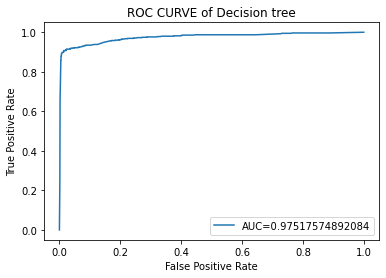

In [144]:
# Plot the ROC curve and add the AUC value as a label
plt.plot(fpr, tpr, label="AUC=" + str(roc_auc3))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE of Decision tree')
plt.show()

### confusion matrix of random forest

[[2774   27]
 [  56  494]]


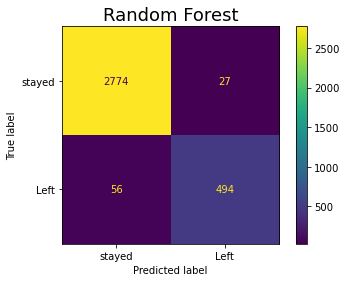

In [145]:
rf_pred2 = rf2.predict(X_test)
print(confusion_matrix(y_test, rf_pred2))
con_ma2 = confusion_matrix(y_test, rf_pred2, labels = rf2.classes_)
disp2 = ConfusionMatrixDisplay( confusion_matrix = con_ma2,
                              display_labels = ["stayed", "Left"])
disp2.plot()
plt.title('Random Forest', size = 18)
plt.show()
sns.set()

In [146]:
# Create classification report for Random forest
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, rf_pred2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.99      0.99      2801
    Predicted would leave       0.95      0.90      0.92       550

                 accuracy                           0.98      3351
                macro avg       0.96      0.94      0.95      3351
             weighted avg       0.97      0.98      0.97      3351



### Feature importance of random Forest

In [147]:
rf2.feature_importances_

array([5.32812368e-01, 1.07916150e-01, 1.41434450e-01, 6.16694952e-02,
       1.54995139e-01, 7.51274515e-06, 3.38962258e-06, 7.14582928e-04,
       4.46913027e-04])

In [148]:
rf_table = pd.DataFrame({'Features': columns, 'Importances': rf2.feature_importances_})
rf_table

,Features,Importances
0,satisfaction_level,0.532812
1,last_evaluation,0.107916
2,number_project,0.141434
3,average_montly_hours,0.061669
4,time_spend_company,0.154995
5,work_accident,0.000008
6,promotion_last_5years,0.000003
7,department,0.000715
8,salary,0.000447


In [155]:
rf_table = rf_table.sort_values(by = 'Importances', ascending = False)

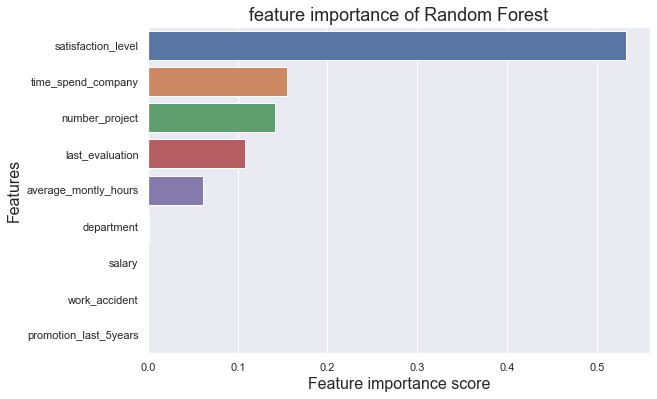

In [157]:
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(x=rf_table['Importances'], y=rf_table['Features'])
ax.set_title("feature importance of Random Forest", size = 18)
ax.set_yticklabels(rf_table['Features'])
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

In [160]:
# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'C': [5, 6], 'D': [7, 8]})

# Concatenate horizontally (along columns)
result = pd.concat([df1, df2], axis=1)

print(result)

   A  B  C  D
0  1  3  5  7
1  2  4  6  8


In [162]:
def models(model_name:str, model, X_test, y_test):
    
    preds = model.predict(X_test)
    auc = roc_auc_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
     # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    
    return table   

In [170]:
table_rf = models('random forest', rf2, X_test, y_test)
table_rf

,model,precision,recall,F1,accuracy,auc
0,random forest,0.948177,0.898182,0.922502,0.975231,0.944271


### concatenate all the tables

In [171]:
#stack the 3 tables
stacked_df = pd.concat([table_lr, table_tree, table_rf], axis = 0)


In [172]:
stacked_df = stacked_df.reset_index(drop=True)
stacked_df

,model,precision,recall,F1,accuracy,auc
0,Logistic regression,0.545213,0.745455,0.629800,0.856162,0.811678
1,Decision Tree,0.902394,0.890909,0.896615,0.966279,0.935994
2,random forest,0.948177,0.898182,0.922502,0.975231,0.944271


# Conclusion

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 